In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
R = 10*10e3
C = 100/10e9

In [3]:
sys = signal.TransferFunction([1],[R*C, 1])
w,mag,phase = signal.bode(sys,np.linspace(10,1e6,1e6))

In [4]:
ganhos1 = 20*np.log10(np.array([0.99314,0.987926,0.934819,
                   0.826152,0.149122,0.04099]))
ganhosd = 20*np.log10(np.array([0.992816,0.987066,0.884942,
                   0.69905,0.12868,0.01049]))
freq = np.array([0.01,0.1,0.5,1,10,100]) / (R*C)

(-60, 10)

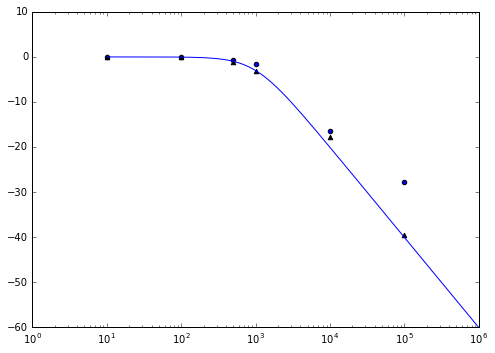

In [27]:
fig = plt.figure(figsize=(8,8/np.sqrt(2)))
ax1 = fig.add_subplot(1,1,1)
ax1.semilogx(w,mag)
ax1.scatter(freq,ganhos1)
ax1.scatter(freq,ganhosd,color='black',marker='^')
ax1.set_xlim([1e0,1e6])
ax1.set_ylim([-60,10])
#plt.semilogx(w,phase)

In [47]:
ee = np.exp(-1/(1e5*R*C))
num = [(1-ee)]
den = [1,(-ee)]
sys2 = signal.TransferFunction(num,den,dt=1e-5)
w2,mag2,phase2 = signal.dbode(sys2,n=50000)
ganhos2 = 20*np.log10(np.array([0.993314,0.985193,0.886429,
                   0.698169,0.086009,0.0087460]))

(-50, 10)

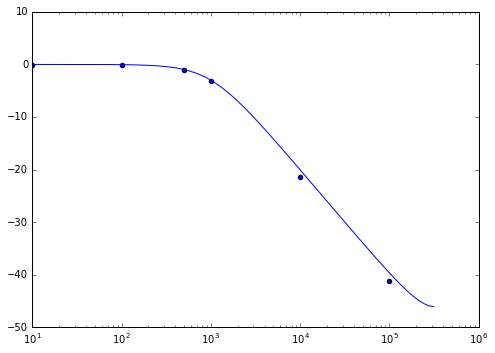

In [62]:
fig2 = plt.figure(figsize=(8,8/np.sqrt(2)))
ax1 = fig2.add_subplot(1,1,1)
ax1.semilogx(w2,mag2)
ax1.scatter(freq,ganhos2)
ax1.set_xlim([1e1,1e6])
ax1.set_ylim([-50,10])

In [59]:
num = [1,1,1,1]
den = [4,0,0,0]
sys3 = signal.TransferFunction(num,den,dt=1e-3)
w3,mag3,phase3 = signal.dbode(sys3,n=5000)
ganhos3 = np.array([0.993879,0.77387,0.665393,0,0.451088,0.264033])
freq3 = np.array([10,100,200,250,300,500])

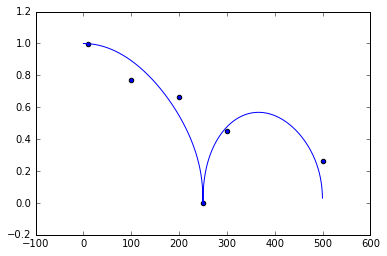

In [60]:
plt.plot(w3/(2*np.pi),np.exp(mag3/20))
plt.scatter(freq3,ganhos3)

In [88]:
t = np.linspace(0,1,1000000)
y = np.sin(2*np.pi*25*t)

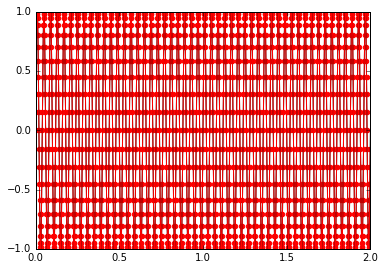

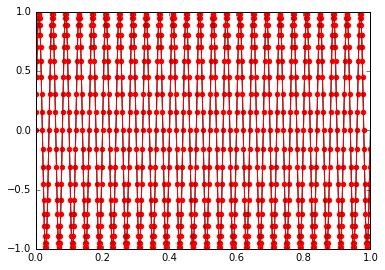

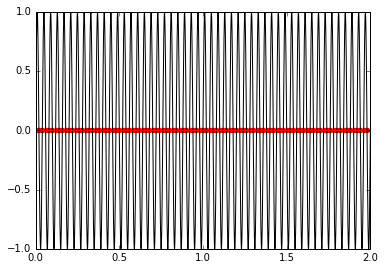

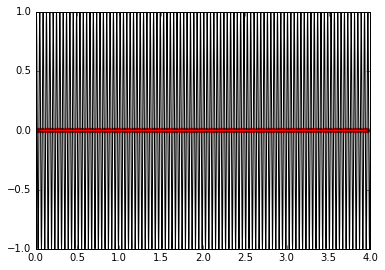

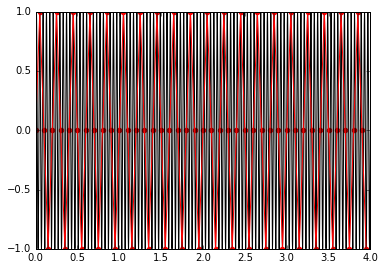

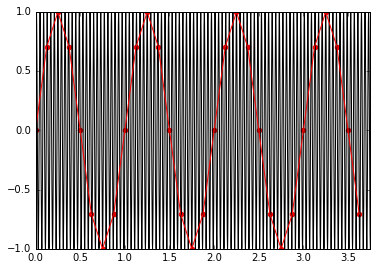

In [136]:
fs = [(1000,2000), (1000,1000), (50,100),
      (25,100), (20,80), (8,30)]
for i,k in fs:
    tt = np.arange(0,k/i,1/i)
    yy = np.sin(2*np.pi*25*tt)
    t = np.linspace(0,k/i,1e6*k/i)
    y = np.sin(2*np.pi*25*t)
    plt.figure(figsize=(6,6/np.sqrt(2)))
    plt.plot(t,y,'k')
    plt.scatter(tt,yy,color='red')
    plt.plot(tt,yy,'r')
    plt.axis([0,k/i,-1,1])
    
    input()